# mpg 데이터 분석하기
### mpg 데이터는 1988, 2004, 2008년도에 미국에서 생산된 자동차에 대한 정보

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 그래프 설정
# 폰트 설정
plt.rcParams["font.family"] = "Malgun Gothic"
# 그래프 크기
plt.rcParams["figure.figsize"] = 20, 10
# 글자 크기
plt.rcParams["font.size"] = 16
# 폰트 설정 시 - (-)기호 깨지는 것 방지
plt.rcParams["axes.unicode_minus"] = False

## 데이터 읽어오기

In [2]:
# 엑셀 파일로부터 데이터프레임을 생성한다.
# sheet_name : 숫자를 넣어주면 시트 순서가 되고 문자열을 넣어주면 시트 이름, 
# 기본값(0) 0은 인덱스 넘버이다. 즉 sheet1 을 하고 싶으면 기본값0, 2는 1.. 등
mpg_df = pd.read_excel("data/mpg.xlsx")
mpg_df.head()

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


### 데이터 살펴보기

```
각 칼럼의 의미
- manufacturer : 제조회사
- model : 자동차 모델명
- displ : 배기량
- year : 생산년도
- cly : 실린더 수
- trans : 변속기 종류
- drv : 구동방식
- cty : 도시연비
- hwy : 고속도로 연비
- fl : 연료 종류
- class : 자동차 종류

```

# 데이터를 사용하기 전 반드시 명세서를 참조해야 한다!
### 이상치 존재 여부에 꼭 필요하기 때문이다

- 연료 종류(fl)에 저장된 값의 종류

```
- c : CNG(가스)
- d : diesel
- e : ethanol
- p : premium
- r : regular(일반 휘발유)
```

# 데이터에 선입견을 가지면 안된다.
# 진정한 데이터 분석은 내가 맞다는 생각을 버리는 것

### 데이터프레임 확인


In [4]:
# RangeIndex : 행이 몇 개인지 파악한다.(234 entries- 행이 234 개)
# Data columns : 전체 칼럼의 개수 파악(total 12 columns - 칼럼이 12개)
# Dtype : 각 컬럼별 데이터 타입. 머신러닝은 숫자 데이터만 학습이 가능하기 때문에
#         object 칼럼(문자열)이 어떤 것이 있는지 확인한다.
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    234 non-null    int64  
 1   manufacturer  234 non-null    object 
 2   model         234 non-null    object 
 3   displ         234 non-null    float64
 4   year          234 non-null    int64  
 5   cyl           234 non-null    int64  
 6   trans         234 non-null    object 
 7   drv           234 non-null    object 
 8   cty           234 non-null    int64  
 9   hwy           234 non-null    int64  
 10  fl            234 non-null    object 
 11  class         234 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 22.1+ KB


In [6]:
# 결측치 : 측정이 안된 부분. 
# isna : 결측치인 부분은 True, 결측치가 아닌 부분은 False로 되어 있는 데이터프레임을 생성한다.
# sum : 각 컬럼별 총합을 구한다. 단 True나 False로 구성되어 있는 경우 True를 1, False를 0으로 취급하여
#       합산한다.
mpg_df.isna().sum()

Unnamed: 0      0
manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
class           0
dtype: int64

In [7]:
# 이상치 확인
# 레이블형 데이터 : 혈액형, 성별 등과 같이 카테고리 형태의 데이터를 의미한다.
mpg_df['manufacturer'].value_counts()

dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
audi          18
hyundai       14
subaru        14
nissan        13
honda          9
jeep           8
pontiac        5
mercury        4
land rover     4
lincoln        3
Name: manufacturer, dtype: int64

In [10]:
# 이상치 확인
# 범위형 데이터 : 키, 몸무게와 같이 최소 최대가 존재하는 값
# min과 max를 통해서 
mpg_df[['cty', 'hwy']].describe()

,cty,hwy
count,234.000000,234.000000
mean,16.858974,23.440171
std,4.255946,5.954643
min,9.000000,12.000000
25%,14.000000,18.000000
50%,17.000000,24.000000
75%,19.000000,27.000000
max,35.000000,44.000000


In [11]:
mpg_df[['cty', 'hwy']].agg(["min", "max"])

,cty,hwy
min,9,12
max,35,44


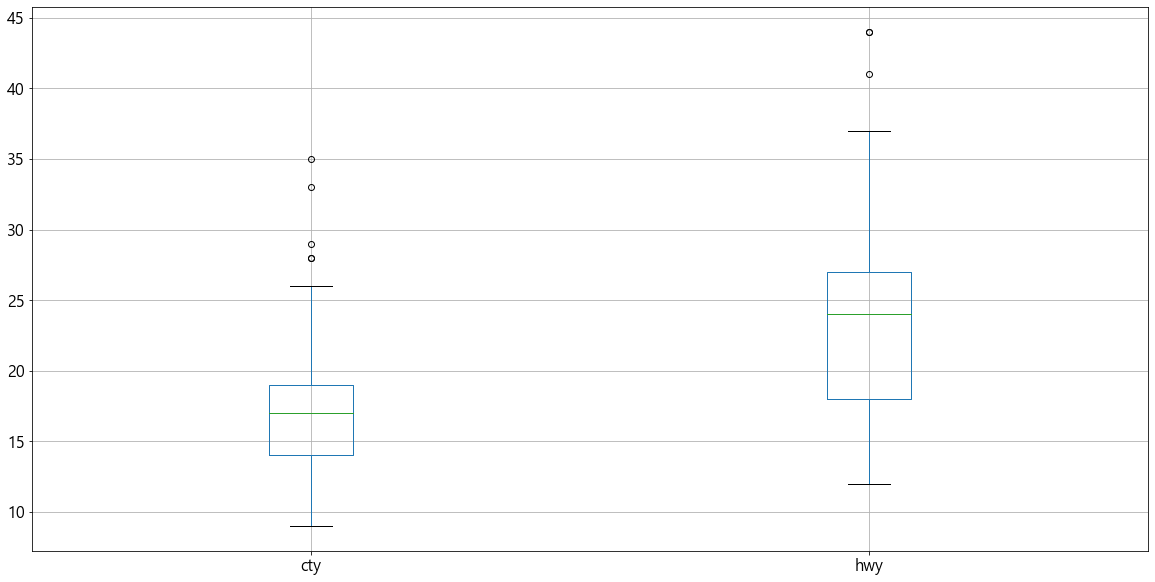

In [13]:
# 극단치
# 다른 값들과 극단적으로 너무 크거나, 너무 작은 값을 의미
# 이상치는 아니지만 이상치의 가능성이 존재하는 값
mpg_df[['cty','hwy']].boxplot()
plt.show()

### 자동차 배기량에 따라 고속도로 연비가 다른지 확인한다.

In [14]:
# 배기량에 대한 요약 통계 정보를 확인한다.
# 중간값인 3.3을 기준으로 한다.
mpg_df['displ'].describe()

count    234.000000
mean       3.471795
std        1.291959
min        1.600000
25%        2.400000
50%        3.300000
75%        4.600000
max        7.000000
Name: displ, dtype: float64

In [17]:
# 배기량이 3.3이하인 로우들을 가져온다.
mpg_a = mpg_df.query("displ <=3.3")
# display(mpg_a)
# 가져온 로우들의 고속도로 연비만(hwy) 가져온다.
mpg_a2 = mpg_a["hwy"]
# display(mpg_a2)
# 가져온 고속도로 연비의 평균을 구한다.
mpg_a3 = mpg_a2.mean()
mpg_a3

27.43089430894309

In [19]:
# 배기량이 3.3 초과인 로우들을 가져온다.
mpg_b = mpg_df.query("displ >3.3")
# 고속도로 연비를 가져온다.
mpg_b2 = mpg_b["hwy"]
# display(mpg_b2)
# 가져온 고속도로 연비의 평균을 구한다.
mpg_b3 = mpg_b2.mean()
mpg_b3

19.01801801801802

In [20]:
print(f'배기량 3.3 이하 자동차 고속도로 연비 : {mpg_a3}')
print(f'배기량 3.3 초과 자동차 고속도로 연비 : {mpg_b3}')

배기량 3.3 이하 자동차 고속도로 연비 : 27.43089430894309
배기량 3.3 초과 자동차 고속도로 연비 : 19.01801801801802


In [21]:
# 구한 배기량을 통해 데이터프레임을 생성한다.
dict1 = {
    '3.3이하' : [mpg_a3],
    "3.3초과" : [mpg_b3]
}

result_df = pd.DataFrame(dict1)
result_df

,3.3이하,3.3초과
0,27.430894,19.018018


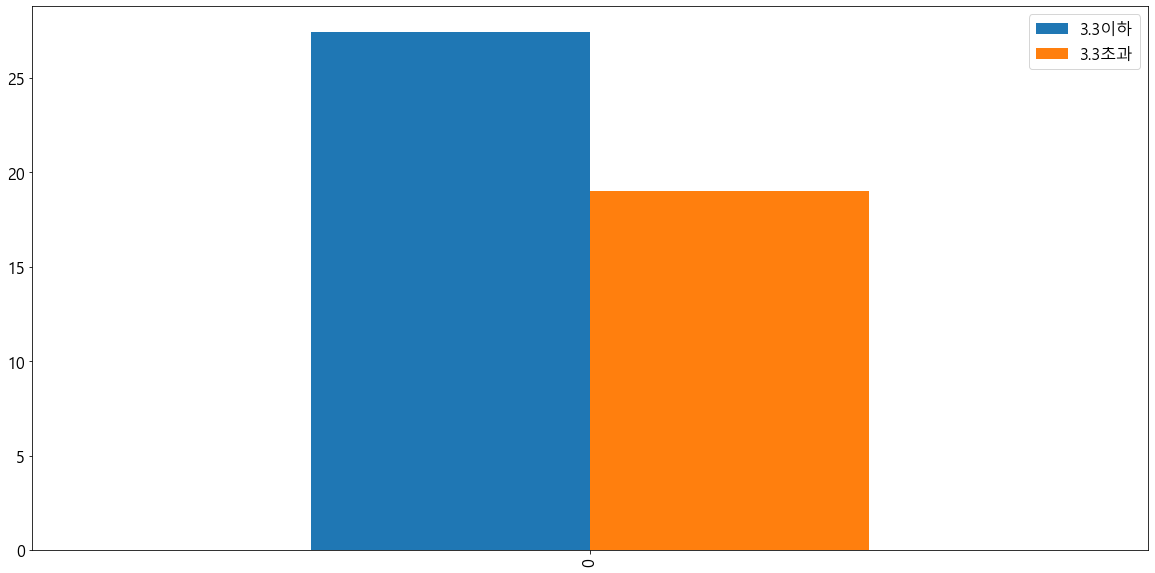

In [23]:
result_df.plot.bar()
plt.show()

In [27]:
dict2 = {
    "고속도로연비":[mpg_a3, mpg_b3]
}
result_df2 = pd.DataFrame(dict2)
result_df2.index = ["3.3이하", "3.3초과"]
result_df2

,고속도로연비
3.3이하,27.430894
3.3초과,19.018018


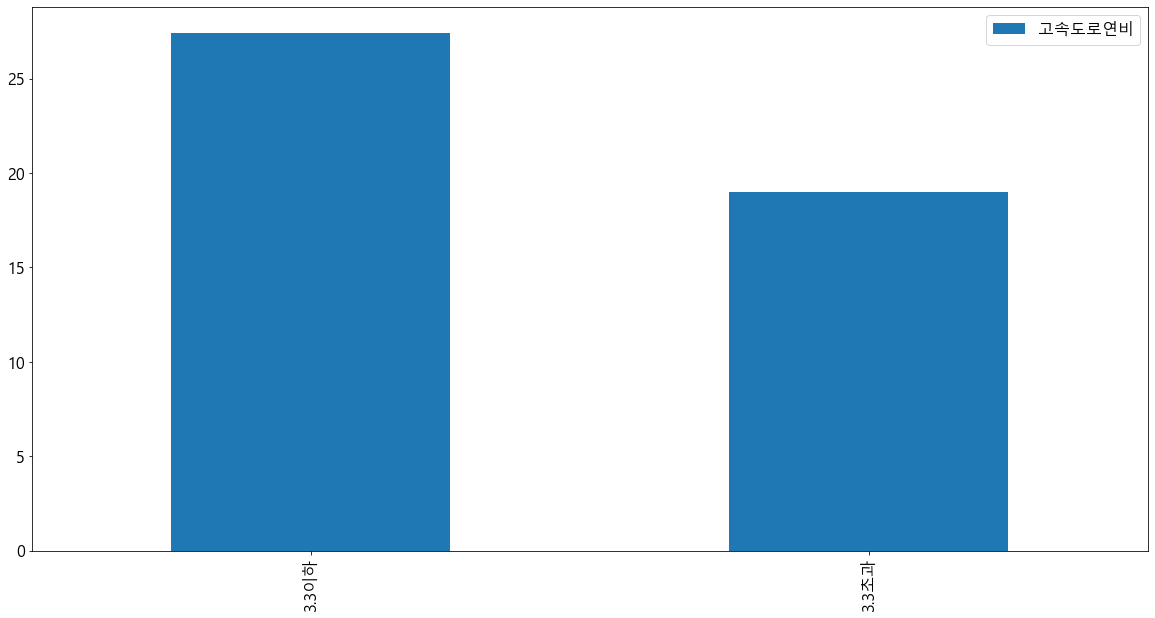

In [28]:
result_df2.plot.bar()
plt.show()

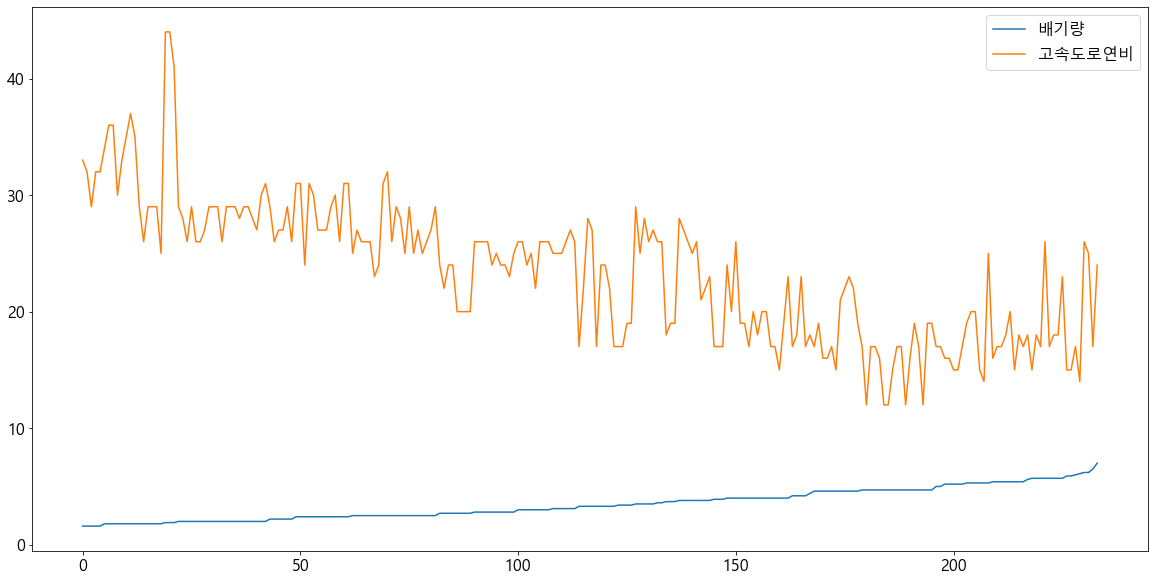

In [39]:
# 배기량과 고속도로 연비를 그래프로 그려본다.
# 시계열 데이터 . 시간에 따라서 변하는 값을 나타냄.
# 즉, x값이 변할때마다 y값도 같이 변하는걸 비교.

# 배기량을 기준으로 정렬한다.
# by : 정렬 기준이 될 컬럼목록
# axis : 작업의 기준 (0 : 행, 1 : 열)
# 순서를 바꿀 기준에 해당.
# ascending : True면 오름차순 정렬(기본이 True이다)
sort_df = mpg_df.sort_values(by=['displ'], axis=0)
# display(sort_df)

# 인덱스를 다시 설정. 왜냐하면 그래프를 그릴때 인덱스를 기준으로 그리기 때문이다.
# drop : True를 설정하면 기존 인덱스는 제거되고 0부터 1씩 증가하는 인덱스가 추가된다.
# False(기본)를 설정하면 기존의 인덱스가 칼럼으로 추가된다.
sort_df2 = sort_df.reset_index(drop=True)
# display(sort_df2)

sort_df2["displ"].plot(label="배기량")
sort_df2["hwy"].plot(label="고속도로연비")

plt.legend()
plt.show()

### 자동차 제조회사에 따라 도시 연비가 다른지 확인한다.

In [40]:
# 자동차 회사와 도시 연비를 가져온다.
df_tmp = mpg_df[["manufacturer", 'cty']]
df_tmp


,manufacturer,cty
0,audi,18
1,audi,21
2,audi,20
3,audi,21
4,audi,16
...,...,...
229,volkswagen,19
230,volkswagen,21
231,volkswagen,16
232,volkswagen,18


In [41]:
# 제조사별 도시 연비 평균을 구한다.
# groupby : 지정된 컬럼을 기준으로 그룹을 묶는다. 컬럼내에 값이 같은 것끼리 하나의 그룹으로 묶는다.
df_result = df_tmp.groupby("manufacturer").mean()
df_result

,cty
manufacturer,
audi,17.611111
chevrolet,15.000000
dodge,13.135135
ford,14.000000
honda,24.444444
hyundai,18.642857
jeep,13.500000
land rover,11.500000
lincoln,11.333333


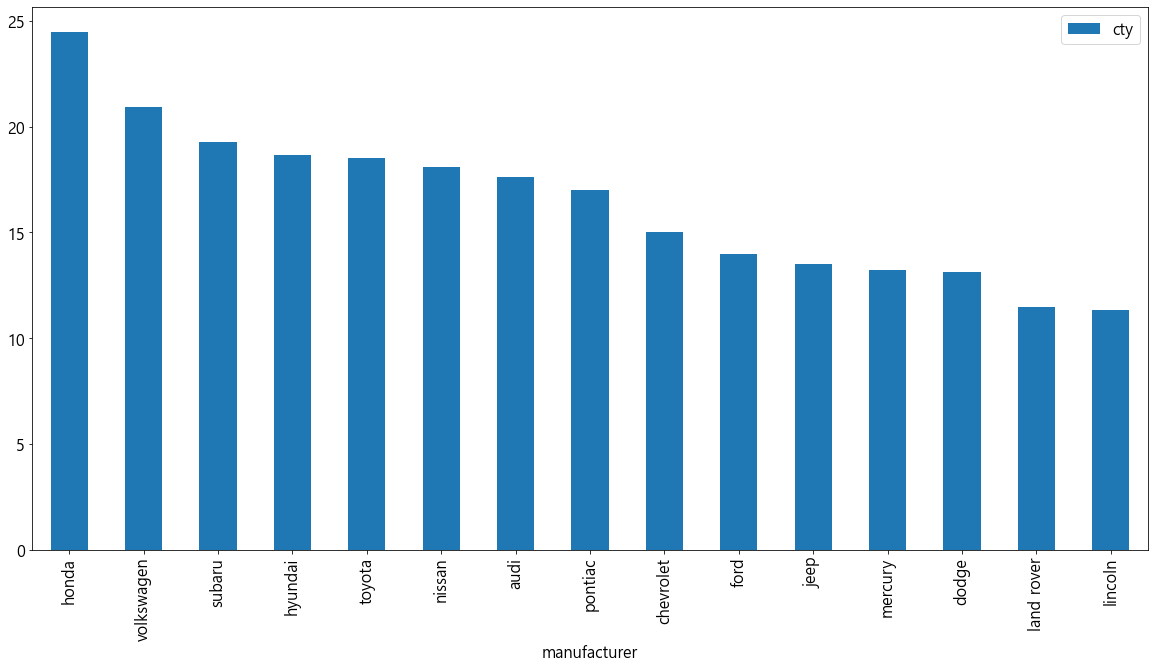

In [43]:
# cty를 기준으로 내림차순 정렬을 한다.
df_result.sort_values('cty', ascending=False, inplace=True)
# 막대 그래프를 그린다.
df_result.plot.bar()
plt.show()